In [1]:
# !pip install numpy
# !pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
x = random.sample(range(1, 999), 500)

In [3]:
print(len(x))

500


In [4]:
x = np.array(x)

In [5]:
u = x.mean()
std = x.std()

In [6]:
u

482.334

In [7]:
x = (x - u)/std

In [8]:
y = []

for i in x:
    y.append((-2 * i) + 5)

In [9]:
y = np.array(y)

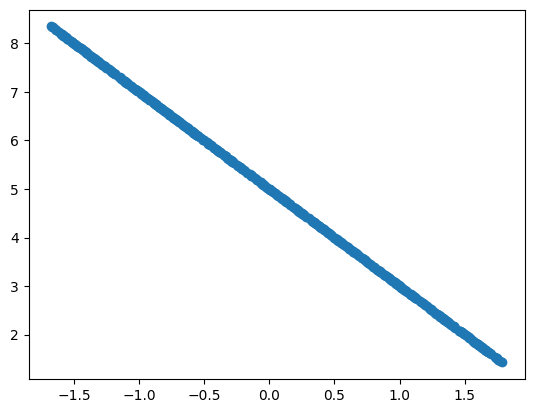

In [10]:
plt.scatter(x, y)

In [11]:
for i in range(10):
    print(x[i], y[i])

-1.1982184538185674 7.396436907637135
-1.1042634617088678 7.208526923417736
1.286369115304601 2.427261769390798
0.15890920998820532 4.682181580023589
-0.8815553322636537 6.763110664527307
0.9940646954077578 3.0118706091844842
-0.5718518397539031 6.143703679507806
0.030156072652690994 4.939687854694618
0.8339932273690102 3.3320135452619795
-0.9720305098507719 6.944061019701544


In [12]:
def hypothesis(X, weights):
    pred = weights[0] + weights[1] * X
    return pred

In [13]:
def loss_func(X, Y, weights):
    N = X.shape[0]
    J = 0
    
    for i in range(N):
        y_hat = hypothesis(X[i], weights)
        y_i = Y[i]
        J += (y_i - y_hat)**2
    return J/N

In [14]:
x.shape

(500,)

In [15]:
def gradient(X, Y, weights):
    grad = np.zeros((2, ))
    
    for i in range(X.shape[0]):
        y_hat = hypothesis(X[i], weights)
        
        grad[0] += (y_hat - Y[i]) * 1
        grad[1] += (y_hat - Y[i]) * X[i]
    
    return grad/X.shape[0]

In [16]:
def gradient_descent(X, Y):
    weights = np.zeros((2, ))
    lr_rate = 0.1
    epochs = 1000
    loss_list = []
    
    for i in range(epochs):
        grad = gradient(X, Y, weights)
        
        weights[0] = weights[0] - lr_rate * grad[0]
        weights[1] = weights[1] - lr_rate * grad[1]
        loss_list.append(loss_func(X, Y, weights))
        
    return weights, loss_list

In [17]:
weights, loss_list = gradient_descent(x, y)

In [18]:
loss_list

[23.490000000000006,
 19.026900000000012,
 15.411789000000008,
 12.483549089999988,
 10.111674762899995,
 8.190456557949,
 6.634269811938692,
 5.373758547670335,
 4.35274442361297,
 3.525722983126507,
 2.855835616332472,
 2.3132268492293027,
 1.8737137478757364,
 1.5177081357793463,
 1.229343589981271,
 0.9957683078848295,
 0.8065723293867118,
 0.6533235868032368,
 0.5291921053106221,
 0.4286456053016043,
 0.34720294029429916,
 0.2812343816383824,
 0.2277998491270895,
 0.1845178777929428,
 0.14945948101228385,
 0.1210621796199501,
 0.09806036549215942,
 0.07942889604864908,
 0.0643374057994056,
 0.05211329869751844,
 0.04221177194499,
 0.034191535275441796,
 0.027695143573107785,
 0.022433066294217208,
 0.01817078369831597,
 0.014718334795636018,
 0.011921851184465213,
 0.009656699459416844,
 0.007821926562127652,
 0.006335760515323402,
 0.00513196601741191,
 0.004156892474103626,
 0.003367082904023952,
 0.0027273371522594323,
 0.0022091430933301385,
 0.0017894059055974,
 0.00144941878

In [19]:
weights

array([ 5., -2.])

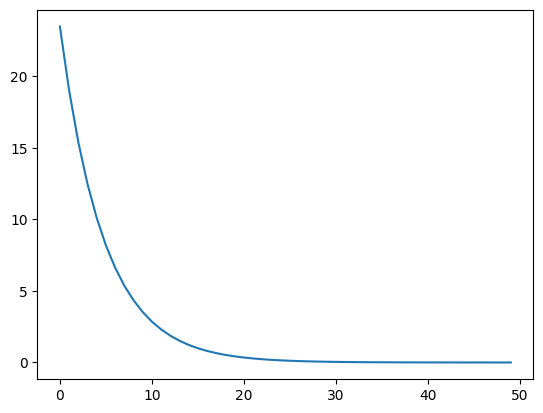

In [20]:
plt.plot(loss_list[:50])

In [21]:
x_test = random.sample(range(1, 999), 500)
x_test = np.array(x_test)

In [22]:
y_test = []

for i in x_test:
    y_test.append(-2 * i + 5)

In [23]:
pred = []
for i in range(x_test.shape[0]):
    print(y_test[i], hypothesis(x_test[i], weights))
    pred.append(hypothesis(x_test[i], weights))

-1517 -1516.9999999999993
-1981 -1980.999999999999
-1335 -1334.9999999999993
-519 -518.9999999999998
-919 -918.9999999999995
-485 -484.9999999999998
-127 -126.99999999999994
-699 -698.9999999999997
-1159 -1158.9999999999995
-51 -50.99999999999997
-1453 -1452.9999999999993
-1833 -1832.999999999999
-935 -934.9999999999995
-1561 -1560.9999999999993
-1889 -1888.999999999999
-43 -42.999999999999986
-663 -662.9999999999997
-1513 -1512.9999999999993
-649 -648.9999999999997
-1141 -1140.9999999999995
-743 -742.9999999999997
-825 -824.9999999999997
-1673 -1672.9999999999993
-635 -634.9999999999998
-1459 -1458.9999999999993
-161 -160.99999999999991
-957 -956.9999999999995
-985 -984.9999999999995
-91 -90.99999999999996
-523 -522.9999999999998
-21 -20.999999999999993
-1127 -1126.9999999999995
-319 -318.99999999999983
-287 -286.9999999999999
-715 -714.9999999999997
-1967 -1966.999999999999
-1223 -1222.9999999999995
-1075 -1074.9999999999995
-1439 -1438.9999999999993
-173 -172.99999999999991
-1051 -1

In [24]:
def r2_score(Y_test, pred):
    
    num = np.sum((Y_test - pred)**2)
    den = np.sum((Y_test - pred.mean())**2)
    
    return 1 - (num/den)

In [25]:
print(r2_score(np.array(y_test), np.array(pred)))

1.0


In [50]:
m1 = np.arange(-50, 50)
m2 = np.arange(-50, 50)

In [51]:
m1, m2 = np.meshgrid(m1, m2)

In [52]:
m2.shape

(100, 100)

In [53]:
J = np.zeros((100, 100))

In [54]:
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        pred = m1[i, j] + m2[i, j] * x_test
        J[i, j] = np.mean((pred - np.array(y_test))**2)

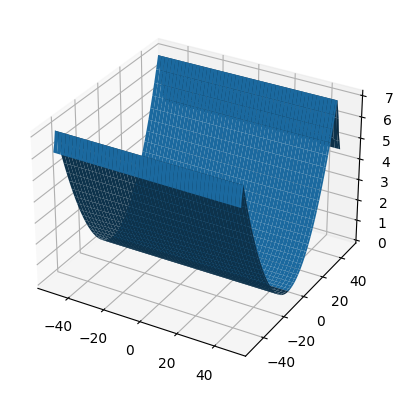

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(m1, m2, J)

In [56]:
J.shape

(100, 100)

In [57]:
type(y_test)

list